# Load & evaluate model

Load the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier

#deep learning libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


Helper functions 

In [2]:
def simple_neural_network():
    clf = Sequential()
    clf.add(Dense(units=16,input_dim = 29, activation = 'relu'))
    clf.add(Dense(units=24, activation = 'relu'))
    clf.add(Dropout(0.5))
    clf.add(Dense(units=20, activation = 'relu'))
    clf.add(Dense(units=24, activation = 'relu'))
    clf.add(Dense(units=1, activation = 'sigmoid'))
    
    clf.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
      
    return clf

# Functionalize model fittting
def FitModel_NN(X,Y,algo_name,algorithm):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    algorithm.fit(x_train,y_train,batch_size=100,epochs=5)
    cf_mtrx = confusion_matrix(y_test, algorithm.predict(x_test))
    ax = sns.heatmap(cf_mtrx, annot=True)
    ax.set(title="Confusion Matrix",
      xlabel="True Label",
      ylabel="Predicted Label")
    pickle.dump(algorithm,open(algo_name,'wb'))

def predModel(filename,x_test,y_test):
    model = pickle.load(open(filename,'rb'))
    cfu_matrix = confusion_matrix(y_test, model.predict(x_test))
    ax = sns.heatmap(cfu_matrix, annot=True)
    ax.set(title=filename + "'s Confusion Matrix",
    xlabel="True Label",
    ylabel="Predicted Label")
    plt.show()

# Data pre-processing

In [3]:
data = pd.read_csv('creditcard.csv')

X = data.drop(labels='Class',axis=1)
Y = data['Class']

SS = StandardScaler()
X['normAmount'] = SS.fit_transform(X['Amount'].values.reshape(-1, 1))
X = X.drop(['Time','Amount'],axis=1)

np.random.seed(10)
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

[Text(0, 0.5, 'Amount transactions'),
 [Text(0, 0, 'No-fraud'), Text(0, 0, 'fraud')],
 Text(0.5, 0, 'No fraud or fraud'),
 Text(0.5, 1.0, 'No. of Fraudent and non-Fraudent transactions')]

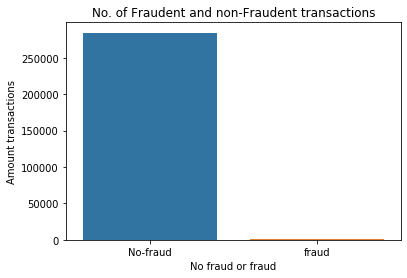

In [4]:
ax = sns.countplot(x='Class',data=data)
ax.set(title="No. of Fraudent and non-Fraudent transactions",
    xticklabels=["No-fraud","fraud"],
    xlabel="No fraud or fraud",
    ylabel="Amount transactions")

# Model Evaluation

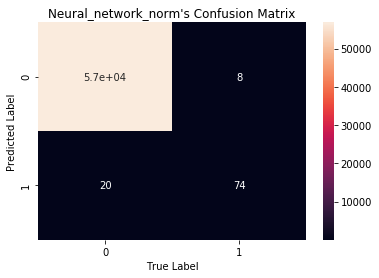

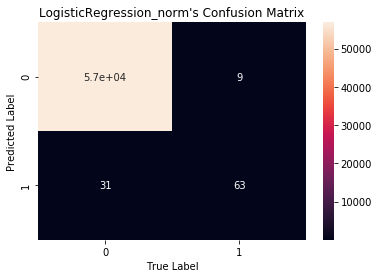

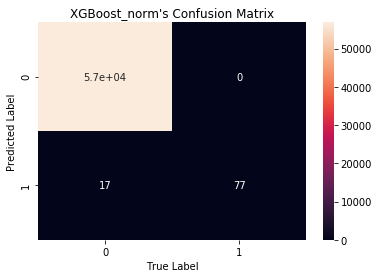

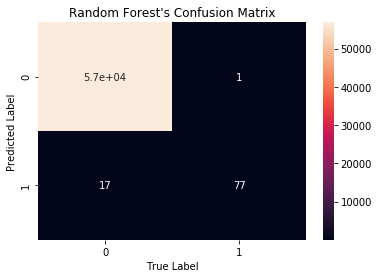

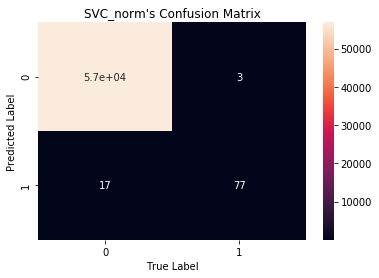

In [5]:
filename = ['Neural_network_norm', 'LogisticRegression_norm', 'XGBoost_norm', 'Random Forest', 'SVC_norm']
for file_name in filename:
    predModel(file_name,x_test,y_test)

In [6]:
filename = ['Neural_network_US', 'LogisticRegression_US', 'XGBoost_US', 'Random Forest_US', 'SVC_US']

In [7]:
from imblearn.under_sampling import NearMiss
sm = NearMiss(version=2)
X_res, Y_res = sm.fit_resample(X,Y)
np.random.seed(10)
x_train_res,x_test_res,y_train_res,y_test_res = train_test_split(X_res,Y_res, test_size = 0.2)

[Text(0, 0.5, 'Amount transactions'),
 [Text(0, 0, 'No-fraud'), Text(0, 0, 'fraud')],
 Text(0.5, 0, 'No fraud or fraud'),
 Text(0.5, 1.0, 'No. of Fraudent and non-Fraudent transactions after undersampling')]

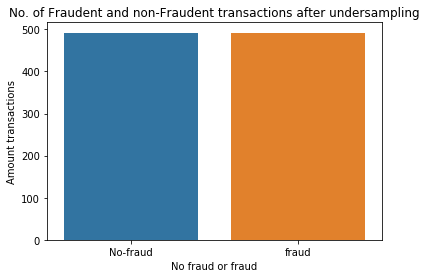

In [8]:
ax = sns.countplot(x='Class',data=pd.DataFrame(Y_res))
ax.set(title="No. of Fraudent and non-Fraudent transactions after undersampling",
    xticklabels=["No-fraud","fraud"],
    xlabel="No fraud or fraud",
    ylabel="Amount transactions")

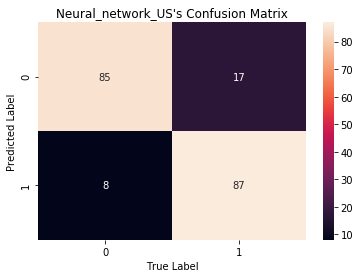

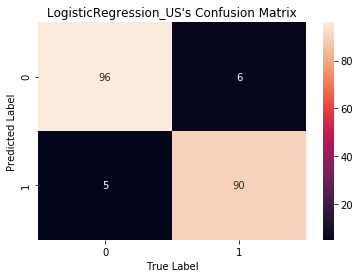

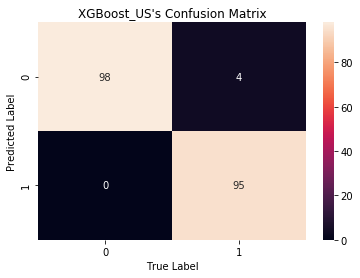

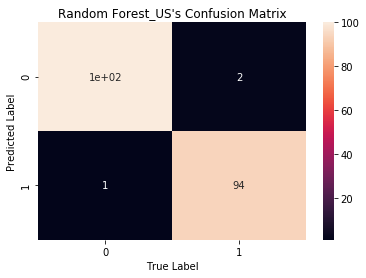

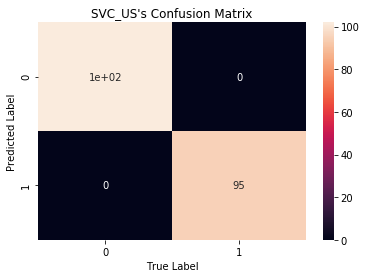

In [9]:
for file_name in filename:
    predModel(file_name,x_test_res,y_test_res)

In [10]:
filename = ['Neural_network_OS', 'LogisticRegression_OS', 'XGBoost_OS', 'Random Forest_OS', 'SVC_OS']

In [11]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(X,Y)
np.random.seed(10)
x_train_res_OS,x_test_res_OS,y_train_res_OS,y_test_res_OS = train_test_split(X_res_OS,Y_res_OS, test_size = 0.2)

[Text(0, 0.5, 'Amount transactions'),
 [Text(0, 0, 'No-fraud'), Text(0, 0, 'fraud')],
 Text(0.5, 0, 'No fraud or fraud'),
 Text(0.5, 1.0, 'No. of Fraudent and non-Fraudent transactions after oversampling')]

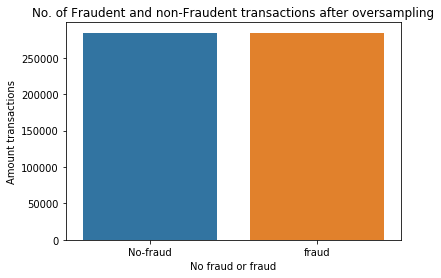

In [12]:
ax = sns.countplot(x='Class',data=pd.DataFrame(Y_res_OS))
ax.set(title="No. of Fraudent and non-Fraudent transactions after oversampling",
    xticklabels=["No-fraud","fraud"],
    xlabel="No fraud or fraud",
    ylabel="Amount transactions")

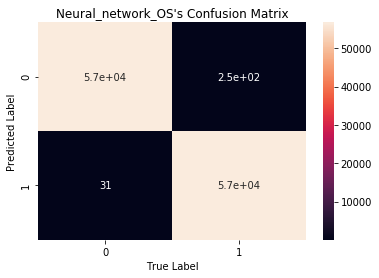

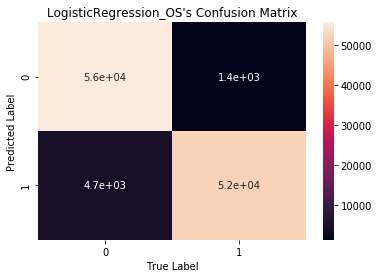

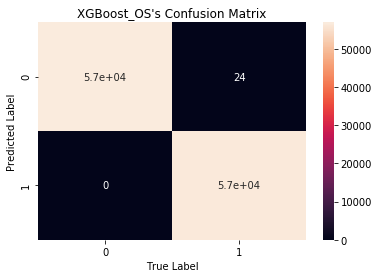

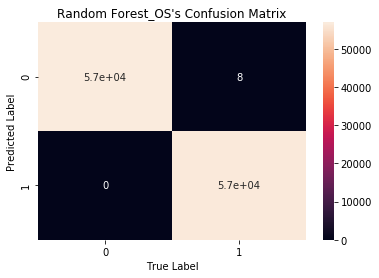

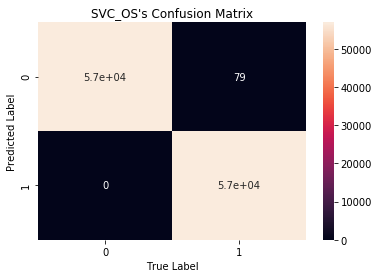

In [13]:
for file_name in filename:
    predModel(file_name,x_test_res_OS,y_test_res_OS)

In [14]:
import streamlit as st

st.write("""
# Test
This app does
""")

st.sidebar.header('User Input Parameters')

def user_input_features():
    V1 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    V2 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    V3 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    V4 = st.sidebar.slider('Test', 0.0, 1.0, 0.5)
    data = {'V1': V1,
           'V2': V1,
           'V3': V1,
           'V4': V1,
           'V5': V1,
           'V6': V1,
           'V7': V1,
           'V8': V1,
           'V9': V1,
           'V10': V1,
           'V11': V1,
           'V12': V1,
           'V13': V1,
           'V14': V1,
           'V15': V1,
           'V16': V1,
           'V17': V1,
           'V18': V1,
           'V19': V1,
           'V20': V1,
           'V21': V1,
           'V22': V1,
           'V23': V1,
           'V24': V1,
           'V25': V1,
           'V26': V1,
           'V27': V1,
           'V28': V1,
           'normAmount': V1
           }
    features= pd.DataFrame(data, index=[0])
    return features
df =  user_input_features()
st.subheader('User Input parameters')
st.write(df)

filename = 'Neural_network_OS'
model = pickle.load(open(filename,'rb'))
pred = model.predict(df)
st.subheader('Prediction')
st.write(pred)
st.subheader('Prediction')
st.write(pred)
st.subheader('Prediction')
st.write(pred)


In [17]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,3.202236e-16
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.023622e+02
